# Libraries

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import qqplot
from statsmodels.formula.api import ols

# Load data

In [116]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


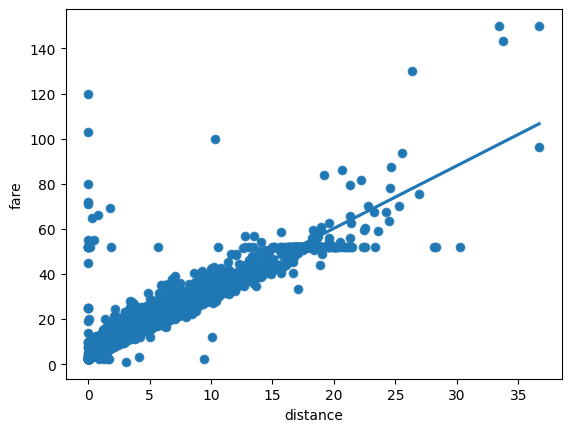

In [117]:
# Draw the scatter plot
sns.scatterplot(data=df, x='distance',y='fare')
sns.regplot(x="distance",
            y="fare",
            data=df,
            ci=None)

# Show the plot
plt.show()

# Clean data

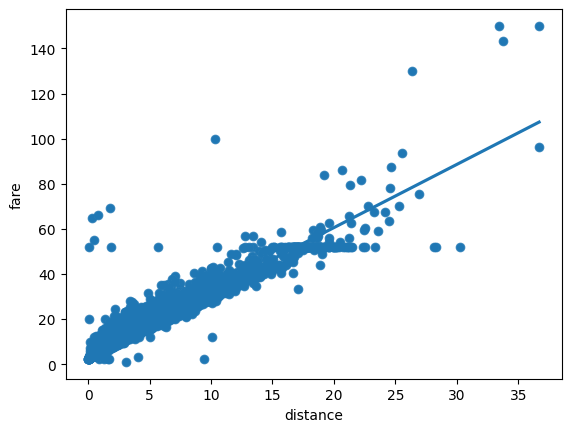

In [118]:
# Remove rides with 0 distance
df = df[df['distance']>0]

# Draw the scatter plot
sns.scatterplot(data=df, x='distance',y='fare')
sns.regplot(x="distance",
            y="fare",
            data=df,
            ci=None)

# Show the plot
plt.show()

# Fit model

In [119]:
# Create the model object
model_distance_vs_fare = ols("fare ~ distance", data=df)

# Fit the model
model_distance_vs_fare = model_distance_vs_fare.fit()

# Print the parameters of the fitted model
model_distance_vs_fare.params

Intercept    4.486669
distance     2.802885
dtype: float64

# Make prediciotn

In [120]:
# Create the explanatory_data 
explanatory_data = pd.DataFrame({'distance': np.arange(0,40)})

# Print it
explanatory_data.head()

,distance
0,0
1,1
2,2
3,3
4,4


In [121]:
# Use model_distance_vs_fare to predict with explanatory_data, call it price_prediction
prediction = model_distance_vs_fare.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(
    fare = prediction)

# Print the result
prediction_data.head()

,distance,fare
0,0,4.486669
1,1,7.289555
2,2,10.092440
3,3,12.895325
4,4,15.698210


# Visualizing predictions

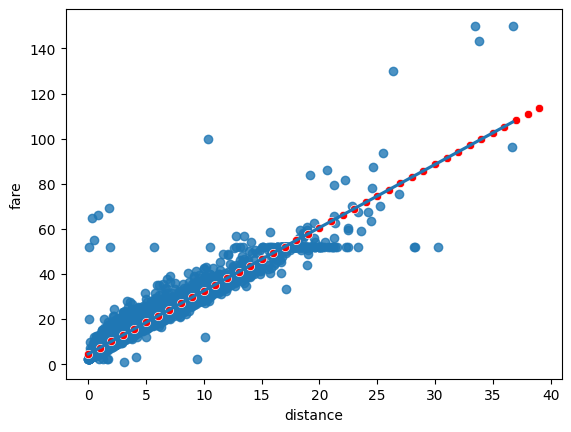

In [122]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="distance",
            y="fare",
            data=df,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="distance",
                y="fare",
                data=prediction_data,
                color="red")

# Show the layered plot
plt.show()

# Analyze results

In [123]:
model_distance_vs_fare.params

Intercept    4.486669
distance     2.802885
dtype: float64

In [124]:
model_distance_vs_fare.fittedvalues

0        8.971286
1        6.700949
2        8.326622
3       26.068885
4       10.540901
          ...    
6428     6.588833
6429    57.012738
6430    16.090614
6431     7.625901
6432    15.277777
Length: 6382, dtype: float64

In [125]:
model_distance_vs_fare.resid

0      -1.971286
1      -1.700949
2      -0.826622
3       0.931115
4      -1.540901
          ...   
6428   -2.088833
6429    0.987262
6430   -0.090614
6431   -1.625901
6432   -0.277777
Length: 6382, dtype: float64

In [126]:
model_distance_vs_fare.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 6.118e+04
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:25:27   Log-Likelihood:                -16995.
No. Observations:                6382   AIC:                         3.399e+04
Df Residuals:                    6380   BIC:                         3.401e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4867      0.056     80.839      0.000       4.378       4.595
distance       2.8029      0.011    247.345      0.000       2.781       2.825
==============================================================================
Omnibus:                     7886.834   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3069989.897
Skew:                           6.284   Prob(JB):                         0.00
Kurtosis:                     109.710   Cond. No.                         6.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Diagnostic plots

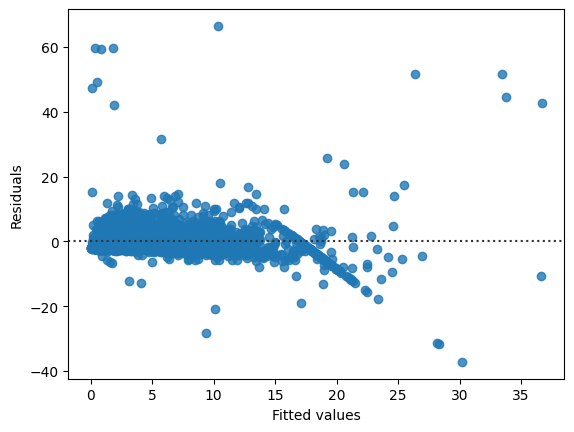

In [127]:
# Plot the residuals vs. fitted values
sns.residplot(x="distance", y="fare", data=df)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

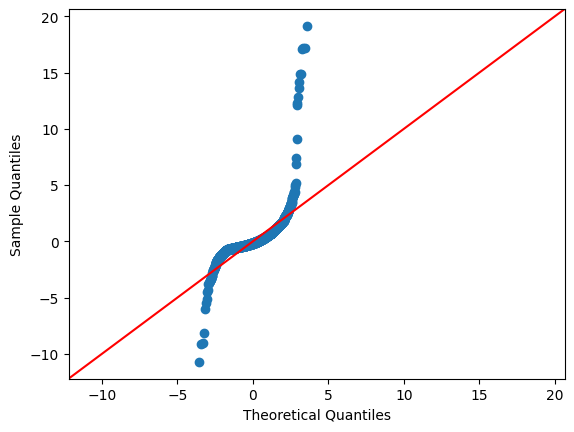

In [128]:
# Create the Q-Q plot of the residuals
qqplot(data=model_distance_vs_fare.resid, fit=True, line="45")

# Show the plot
plt.show()

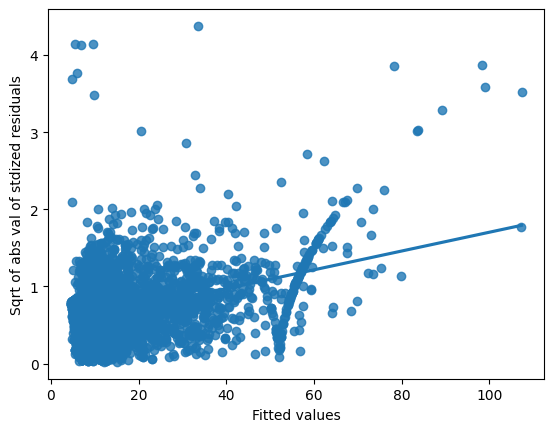

In [129]:
# Preprocessing steps
model_norm_residuals = model_distance_vs_fare.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=model_distance_vs_fare.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

# Extreme values analysis

In [131]:
# Create summary_info
summary_info = model_distance_vs_fare.get_influence().summary_frame()

In [132]:
# Add the hat_diag column to df, name it leverage
df["leverage"] = summary_info["hat_diag"]

# Sort df by leverage in descending order and print the head
print(df.sort_values(by="leverage", ascending=False).head())

                  pickup             dropoff  passengers  distance   fare  \
5364 2019-03-17 16:59:17 2019-03-17 18:04:08           2     36.70  150.0   
4219 2019-03-08 20:07:54 2019-03-08 21:10:00           1     36.66   96.5   
4050 2019-03-13 14:05:19 2019-03-13 15:01:16           6     33.76  143.5   
5648 2019-03-19 14:21:35 2019-03-19 15:51:28           2     33.46  150.0   
2397 2019-03-21 18:56:59 2019-03-21 19:49:58           1     30.23   52.0   

        tip  tolls   total   color      payment        pickup_zone  \
5364   0.00  24.02  174.82  yellow         cash        JFK Airport   
4219  10.00   5.76  113.56  yellow  credit card        JFK Airport   
4050   0.00   0.00  144.30  yellow         cash  LaGuardia Airport   
5648   0.00  18.90  169.70   green         cash      East Flushing   
2397  13.11   5.76   78.67  yellow  credit card        JFK Airport   

                       dropoff_zone pickup_borough dropoff_borough  leverage  
5364                    JFK Airport  

In [134]:
# Add the cooks_d column to df, name it cooks_dist
df["cooks_dist"] = summary_info["cooks_d"]

# Sort df by cooks_dist in descending order and print the head.
print(df.sort_values(by="cooks_dist", ascending=False).head())

                  pickup             dropoff  passengers  distance   fare  \
5648 2019-03-19 14:21:35 2019-03-19 15:51:28           2     33.46  150.0   
5364 2019-03-17 16:59:17 2019-03-17 18:04:08           2     36.70  150.0   
4050 2019-03-13 14:05:19 2019-03-13 15:01:16           6     33.76  143.5   
2231 2019-03-11 10:17:31 2019-03-11 11:03:55           1     26.35  130.0   
2397 2019-03-21 18:56:59 2019-03-21 19:49:58           1     30.23   52.0   

        tip  tolls   total   color      payment        pickup_zone  \
5648   0.00  18.90  169.70   green         cash      East Flushing   
5364   0.00  24.02  174.82  yellow         cash        JFK Airport   
4050   0.00   0.00  144.30  yellow         cash  LaGuardia Airport   
2231   0.00   5.76  136.56  yellow         cash  East Harlem North   
2397  13.11   5.76   78.67  yellow  credit card        JFK Airport   

                       dropoff_zone pickup_borough dropoff_borough  leverage  \
5648                            NaN 